# STAT 207 Group Lab Assignment 13 - [10 total points]

## Measuring Model Performance & Model Searching

<hr>

## <u>Lab Grading</u>:

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

grade this submission

If you said **my submission is under netID** above, we will not read any more of your lab submission.

If you said **grade this submission** above, who worked with you on this submission?  Write both their **names** and **netIDs**.  

Also, discuss and record if you've ever been on a cruise before.

Joonwoo Ha(ha47): No
Soobin Jang(soobinj2): No

## <u>Purpose</u>:
You should work in groups of 2-3 on this report (not working in groups without permission will result in a point deduction). The purpose of this group lab assignment is to assess model fit and overfitting through model searching.
<hr>

### Group Roles

Suggested and specified roles are provided below: 

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [1]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

## Case Study: Crew Size on Cruise Ships

We will look at data collected about the size of a crew (in hundreds) on cruise ships.  In particular, we would like to be able to predict the size of the crew needed for a cruise ship from other characteristics about that ship.  The original data can be found here: https://github.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/blob/master/cruise_ship_info.csv.

For this case study, we will consider the following variables:

- **Age**: the age of the ship (years)
- **Tonnage**: the amount of water the ship displaces
- **passengers**: the max number of passengers the ship can hold (in 100s)
- **length**: the length of the ship (in hundrds of feet)
- **cabins**: the number of cabins (in 100s)
- **passenger_density**: a space ratio for how much space is on board per passenger
- **crew**: the number of crew members on the ship (in 100s)

The code cell below will read in the data for you and create a test and training set.  Be sure to run the cell. 

In [2]:
df = pd.read_csv('cruise_ship_info.csv')
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 425)

df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


### 1. [4 points] Searching for a Good Model

**a)** Perform forward selection using the adjusted $R^2$ ($R^2_\text{adj}$) as your metric on your training data.

In [6]:
formula = 'crew ~ Age + Tonnage + passengers + length + cabins + passenger_density'
model = smf.ols(formula, data=df_train).fit()
print('Original Adjusted R²: ', model.rsquared_adj)

Original Adjusted R²:  0.9311734227038804


In [5]:
# ROUND 1 - remove age

model1 = smf.ols('crew ~ Tonnage + passengers + length + cabins + passenger_density', data=df_train).fit()
print('Removed Age → Adjusted R2:', model1.rsquared_adj)

Removed Age → Adjusted R2: 0.9315866129723882


In [7]:
# ROUND 2 - remove Age & length 

model2 = smf.ols('crew ~ Tonnage + passengers + cabins + passenger_density', data=df_train).fit()
print('Removed Age, length → Adjusted R2:', model2.rsquared_adj)

Removed Age, length → Adjusted R2: 0.9283207384888144


In [9]:
# ROUND 3 - remove Tonnage

model3 = smf.ols('crew ~ passengers + length + cabins + passenger_density', data=df_train).fit()
print('Removed Tonnage → Adjusted R2:', model3.rsquared_adj)

Removed Tonnage → Adjusted R2: 0.9315028318845173


In [10]:
# ROUND 4 - remove passengers

model4 = smf.ols('crew ~ Tonnage + length + cabins + passenger_density', data=df_train).fit()
print('Removed passengers → Adjusted R2:', model4.rsquared_adj)

Removed passengers → Adjusted R2: 0.928793034526106


In [12]:
# ROUND 5 - remove cabins

model5 = smf.ols('crew ~ Tonnage + passengers + length + passenger_density', data=df_train).fit()
print('Removed cabins → Adjusted R2:', model5.rsquared_adj)

Removed cabins → Adjusted R2: 0.8871632842490768


In [14]:
# ROUND 6 - remove passenger_density

model6 = smf.ols('crew ~ Tonnage + passengers + length + cabins', data=df_train).fit()
print('Removed passenger_density → Adjusted R2:', model6.rsquared_adj)

Removed passenger_density → Adjusted R2: 0.9321283752390105


**b)** Briefly summarize the results of this selection process.  Be sure to answer:
- What was your starting model?
- What was the most important initial variable to add to the model?
- What was your final model?
- What was the $R^2_\text{adj}$ of your final model?

We began with a full model including all six predictors: `Age`, `Tonnage`, `passengers`, `length`, `cabins`, and `passenger_density`. Using adjusted R^2 as the selection metric, we evaluated how removing each variable would affect the model's performance.

We found that removing `Age` improved the adjusted R^2, increasing it from 0.9312 to 0.9316. This indicated that `Age` did not contribute positively to the model and was the least important variable.

Final model predictors: Tonnage, passengers, length, cabins, passenger_density.

Adjusted R^2 of the final model: **0.9316**

### 2. [2.5 points]  Check for Multicollinearity

**a)** Now, check your model that you selected in Question 1 after forward selection for multicollinearity.  You may use either a visualization or summary statistics to check.

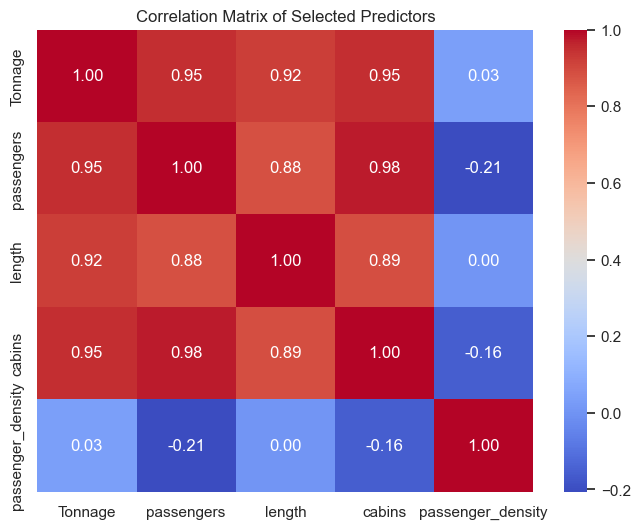

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_vars = ['Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']
corr_matrix = df_train[selected_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Predictors")
plt.show()


**b)** Based on what you see from part a, which variables (if any) would you like to remove from your model to reduce multicollinearity?  Briefly explain how you selected your variables that you wanted to remove.  Then, fit a new model to the training data using your reduced set of selected predictors.

*Note*: If you are satisfied with your current model for multicollinearity, pick the least important predictor to remove from the model, and fit an updated model to the training data with your selected predictors.  Be sure to explain why you did not want to remove any variables.

*Second note*: there is not a single correct answer here.  We are hoping that you make a reasonable choice based on your current understanding of the data.

From the correlation heatmap, we observed strong multicollinearity among several predictors. In particular, the variables `Tonnage`, `passengers`, and `cabins` had very high pairwise correlations (≥ 0.95), indicating that they likely contain redundant information.

To reduce multicollinearity, I decided to remove **`cabins`**, which showed the strongest correlation with `passengers` (0.98). I chose to keep `passengers` since it has a more direct and interpretable relationship with crew size.

The updated model includes the following predictors:`Tonnage`, `passengers`, `length`, `passenger_density`

I then fit a new linear regression model to the training data using this reduced set of predictors.


In [16]:
model_reduced = smf.ols('crew ~ Tonnage + passengers + length + passenger_density', data=df_train).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                   crew   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     246.7
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           3.62e-57
Time:                        20:46:02   Log-Likelihood:                -198.98
No. Observations:                 126   AIC:                             408.0
Df Residuals:                     121   BIC:                             422.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2251      1.23

### 3. [3.5 points] Comparing Our Two Models for Overfitting

We now have two candidate models: our model from forward selection in Question 1 and our reduced model from Question 2.  In this question, we'll aim to identify which model performs better on *new* data.

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

y_test = df_test['crew']

model1 = smf.ols('crew ~ Tonnage + passengers + length + cabins + passenger_density', data=df_train).fit()
y_pred1 = model1.predict(df_test)
r2_model1 = r2_score(y_test, y_pred1)
rmse_model1 = mean_squared_error(y_test, y_pred1, squared=False)

y_pred2 = model_reduced.predict(df_test)
r2_model2 = r2_score(y_test, y_pred2)
rmse_model2 = mean_squared_error(y_test, y_pred2, squared=False)

**a)** Calculate the RMSE for each of our two models on each of our two data sets: the training and the test set.  Be sure that you use the same original model for both calculations (that is, you don't need to re-fit a second version of your model to your test data).

In [18]:
y_train = df_train['crew']

y_train_pred1 = model1.predict(df_train)
train_rmse_model1 = mean_squared_error(y_train, y_train_pred1, squared=False)

y_train_pred2 = model_reduced.predict(df_train)
train_rmse_model2 = mean_squared_error(y_train, y_train_pred2, squared=False)

print(f"Model 1 (with cabins) - Train RMSE: {train_rmse_model1:.4f}")
print(f"Model 2 (without cabins) - Train RMSE: {train_rmse_model2:.4f}")


Model 1 (with cabins) - Train RMSE: 0.9102
Model 2 (without cabins) - Train RMSE: 1.1738


In [20]:
print(f"Model 1 (with cabins) - R²: {r2_model1:.4f}, RMSE: {rmse_model1:.4f}")
print(f"Model 2 (without cabins) - R²: {r2_model2:.4f}, RMSE: {rmse_model2:.4f}")

Model 1 (with cabins) - R²: 0.8697, RMSE: 1.1665
Model 2 (without cabins) - R²: 0.8474, RMSE: 1.2625


**b)** Based on these results, which model would you prefer?  Briefly explain how you picked your preferred model.

Based on the RMSE values, **Model 1 (with cabins)** has better performance on both the training and test sets:

- **Train RMSE**: 0.9102 (Model 1) vs. 1.1738 (Model 2)
- **Test RMSE**: 1.1665 (Model 1) vs. 1.2625 (Model 2)

Although Model 2 reduces multicollinearity by removing a highly correlated variable (`cabins`), it also loses some predictive power. Since Model 1 performs better on both the training and test sets and does not show signs of severe overfitting (small RMSE gap between train and test), I would prefer **Model 1**.


**c)** Do your results from Question 1 (forward searching) and Question 3 (RMSE) suggest using the same model?  

What characteristic of a model is prioritized by each of the metrics used in Questions 1 ($R^2_\text{adj})$, 2 (multicollinearity), and 3 (RMSE)?  

*Note:* You should have one answer for each of the three metrics.

The results from Question 1 and Question 3 both suggest using **Model 1**:
- In Question 1, Model 1 had the highest adjusted R^2 value (0.9316) after forward selection.
- In Question 3, Model 1 had the lowest RMSE on both training and test data, indicating better predictive performance.

Each metric prioritizes different characteristics of model quality.

- **Adjusted R^2** (Q1): prioritizes **model fit**, while penalizing for unnecessary predictors. It helps avoid overfitting by adjusting for the number of variables.
- **Multicollinearity Check** (Q2): prioritizes **model stability and interpretability**, ensuring that predictors are not linearly dependent on each other.
- **RMSE** (Q3): prioritizes **predictive accuracy**, measuring how well the model performs on unseen data.

In conclusion, even though multicollinearity exists in Model 1, it performs better overall in terms of both model fit and predictive accuracy. Therefore, it is reasonable to select Model 1.